In [10]:
import pandas as pd
import numpy as np
import sqlite3

# Load dataset
import pandas as pd

df = pd.read_csv("creditcard.csv", usecols=["Class", "Amount", "V27", "V28"])

df.head()


,V27,V28,Amount,Class
0,0.133558,-0.021053,149.62,0
1,-0.008983,0.014724,2.69,0
2,-0.055353,-0.059752,378.66,0
3,0.062723,0.061458,123.50,0
4,0.219422,0.215153,69.99,0


In [ ]:
df['transaction_id'] = df.index 


conn = sqlite3.connect("creditcard_fraud.db")
df.to_sql("transactions", conn, if_exists="replace", index=False)


284807

In [8]:
%load_ext sql
%sql sqlite:///creditcard_fraud.db

#checking if table exists as required
%sql SELECT name FROM sqlite_master WHERE type='table';

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///creditcard_fraud.db
Done.


name
transactions


In [13]:
import pandas as pd

query = """
SELECT Amount, V27, V28, Class
FROM transactions
"""
df_sql = pd.read_sql(query, conn)


In [15]:
print(df_sql['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_sql[["Amount", "V27", "V28"]]
y = df_sql["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.19      0.32        98

    accuracy                           1.00     56962
   macro avg       0.93      0.60      0.66     56962
weighted avg       1.00      1.00      1.00     56962



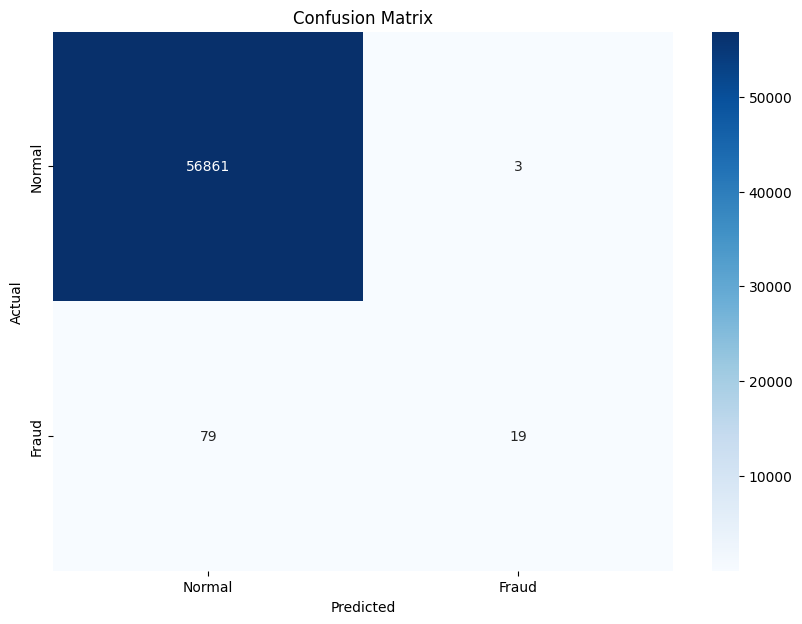

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)   
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Users\arifu\Documents\Homework\2ndYear\miniconda3\envs\ml-env\lib\site-packages\xgboost\training.py:183: UserWarning: [16:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.11      0.19        98

    accuracy                           1.00     56962
   macro avg       0.79      0.56      0.59     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

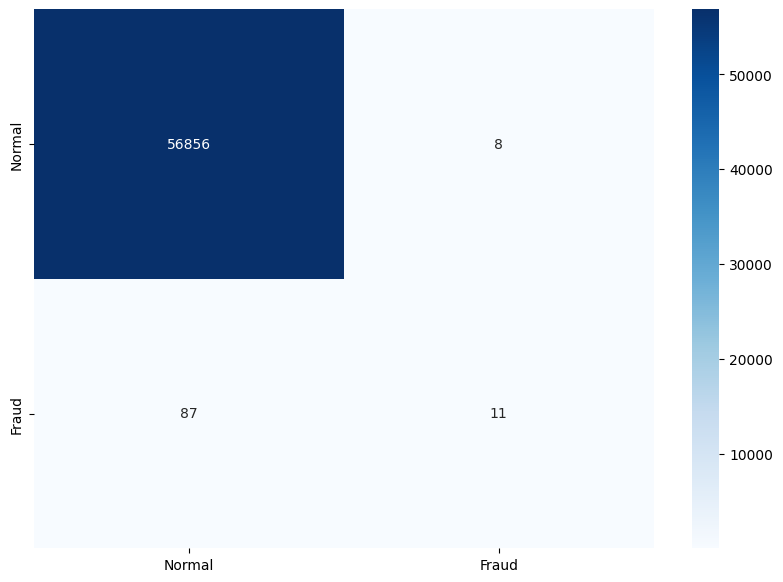

In [18]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])